In [8]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
dataset = pd.read_csv('../inputs/candy.csv')
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [10]:
# al ser aprendizaje no supervisado, no separamos nuestro datasets en partes
# eliminaremos los nombres de los caramelos, ya que eso no nos sirve para el algoritmo
X = dataset.drop('competitorname', axis=1)
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8)
kmeans.fit(X)
print('Total de centros: ', len(kmeans.cluster_centers_))
print('=' * 64)

Total de centros:  4


In [12]:
col_name = "clusters"
dataset[col_name] = kmeans.predict(X)
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,clusters
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,3
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


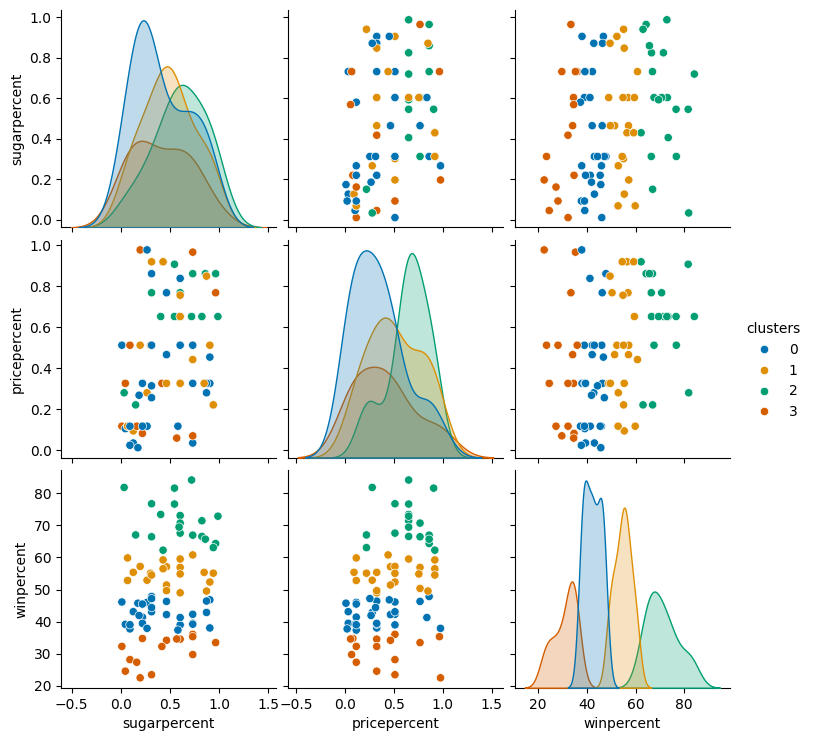

In [13]:
sns.pairplot(dataset[['sugarpercent', 'pricepercent', 'winpercent', col_name]], hue=col_name, palette='colorblind')
plt.savefig("pares.png")
plt.show()
plt.close()